In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import wandb
import datetime

In [2]:
entity = "evangeorgerex"
project_name = "fwal"
# sweep_id = "xd36y8wm"

# # Fetch the sweep
# api = wandb.Api()
# sweep = api.sweep(f"{entity}/{project_name}/{sweep_id}")


In [24]:
# runpath = "evangeorgerex/fwal/c4rpo9nd" # mnist run
# runpath = "evangeorgerex/fwal/8s5bm3rj" # good mice protein run
# runpath = "evangeorgerex/fwal/diiym9cy" # coil20
# runpath = "evangeorgerex/fwal/o56v87o7" # isolet
# runpath = "evangeorgerex/fwal/h3y2auch" # usps
runpath = "evangeorgerex/fwal/zza4vp2w"
api = wandb.Api()
run = api.run(runpath)
dataset = run.config["dataset"]

In [25]:
hist = run.summary['best_mask_parameters']

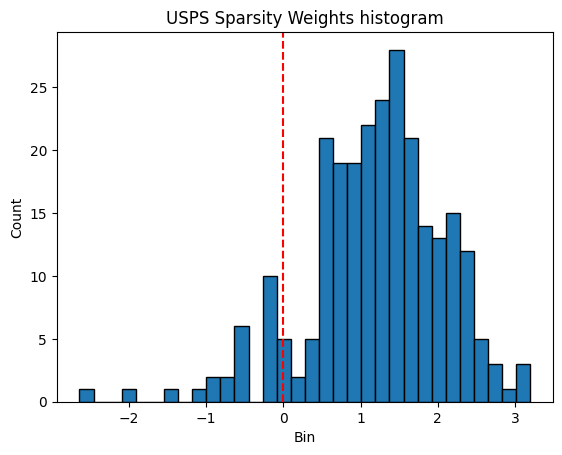

In [26]:

# Histogram data
values = hist['values']
bins = hist['bins']

# Calculate bin widths and bin centers
bin_widths = [j - i for i, j in zip(bins[:-1], bins[1:])]
bin_centers = [(i + j) / 2 for i, j in zip(bins[:-1], bins[1:])]

# Plotting
plt.bar(bin_centers, values, width=bin_widths, align='center', edgecolor='black')
plt.xlabel('Bin')
plt.ylabel('Count')
plt.axvline(x=0, color='red', linestyle='--')

plt.title(f'{dataset} Sparsity Weights histogram')
plt.show()


In [24]:
# Initialize a list to store data
data = []

# Iterate over each run and fetch the required data
for run in sweep.runs:
    config = run.config
    summary_metrics = run.summary
    # You might need to adjust the key names based on your actual data
    try:
        data.append({
            'dataset': config['dataset'],  
            'seed_model_init': config['seed_model_init'], 
            # Add other hyperparameters here as needed
            'normalize_reconstruction': config['normalize_reconstruction'],  
            'balanced_accuracy': summary_metrics['bestmodel_valid/balanced_accuracy'],  # Adjust based on your summary metrics
            # Include other config elements as necessary
        })
    except:
        print(f"Run {run.id} failed")

# Convert the list to a DataFrame
df = pd.DataFrame(data)

df = df[df['dataset'] != 'poly_binarised_decimalised_mod10_synth'] # excliude this dataset

# Group by dataset and other relevant hyperparameters (excluding seed), and calculate the mean of balanced_accuracy across seeds
grouped_df = df.groupby(['dataset', 
                         'normalize_reconstruction'  # Add other hyperparameters here, except 'seed'
                        ]).agg({'balanced_accuracy': 'mean'}).reset_index()

# Now, find the entry with the maximum 'balanced_accuracy' for each 'dataset'
result_df = grouped_df.loc[grouped_df.groupby('dataset')['balanced_accuracy'].idxmax()]

# Display the resulting DataFrame
print(result_df)


Run x5mlx25b failed
Run 6y520ck9 failed
Run fa1xfouk failed
Run 1691mmmr failed
             dataset normalize_reconstruction  balanced_accuracy
0              MNIST  num_non_masked_features           0.980751
2  simple_trig_synth             num_features           0.979334


In [21]:
print(grouped_df)

             dataset normalize_reconstruction  balanced_accuracy
0              MNIST  num_non_masked_features           0.980751
1  simple_trig_synth                     None           0.975825
2  simple_trig_synth             num_features           0.979334
3  simple_trig_synth  num_non_masked_features           0.978480
